In [1]:
# %matplotlib widget
from matplotlib import pyplot as plt
from IPython.display import display
import pandas as pd
import numpy as np

import mysql.connector
import pandas.io.sql as psql
import creds

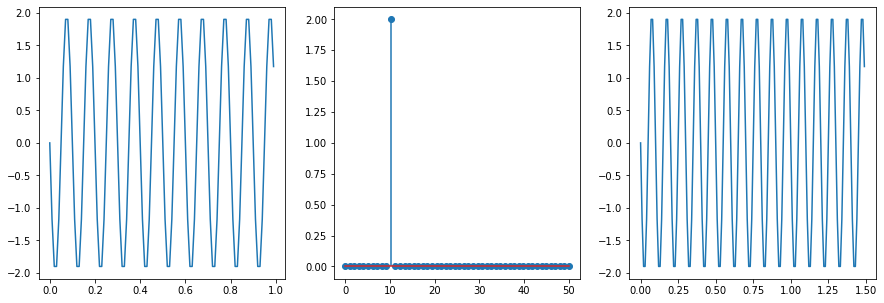

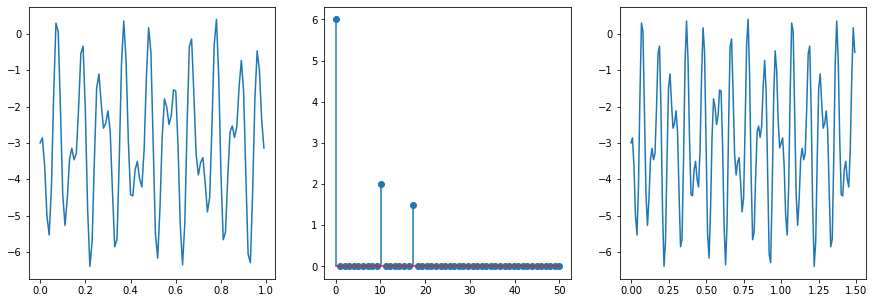

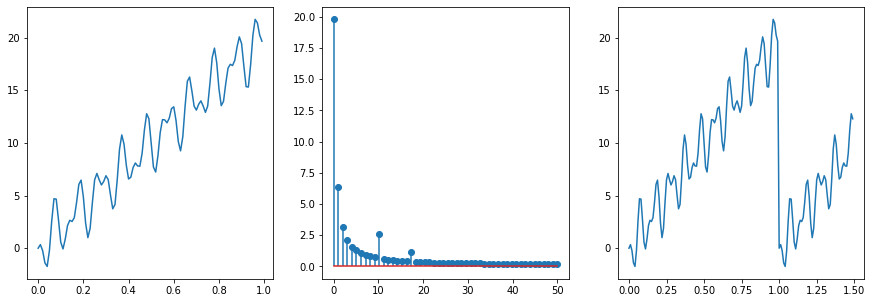

In [2]:
# testing numpy's dft

def generate_wave(ts, amplitude, frequency, phaseshift):
    return amplitude * np.cos(2 * np.pi * frequency * ts + phaseshift)

def dft_extrapolate(freqdom, num_datapoints):
    n = freqdom.size
    amplitudes = np.absolute(freqdom)/n
    phaseshifts = np.angle(freqdom)
    frequencies = np.fft.fftfreq(n)
    ts = np.arange(0, num_datapoints)
    # wave = np.sum(generate_wave(np.expand_dims(ts, axis=1), amplitudes, frequencies, phaseshifts), axis=1)
    wave = np.zeros(num_datapoints, dtype=np.float)
    for i in range(n):
        wave = wave + generate_wave(ts, amplitudes[i], frequencies[i], phaseshifts[i])
    return wave

sr = 1/100 # sampling rate
t = np.arange(0,1,sr)
t_extended = np.arange(0,1.5,sr)

y_0 = generate_wave(t, 2, 10, -1.5*np.pi)
# Perform Fourier transform using scipy
y_fft = np.fft.fft(y_0)
# Plot data
n = np.size(t)
fr = 1/(2*sr) * np.linspace(0,1,n//2)
y_m = 2/n * abs(y_fft[0:np.size(fr)])
#y_hat = 
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15,5))
ax[0].plot(t, y_0)    # plot time series
ax[1].stem(fr, y_m) # plot freq domain
ax[2].plot(t_extended, dft_extrapolate(y_fft, len(t_extended)))   # plot inverse fft and extrapolation

# https://dsp.stackexchange.com/questions/59921/the-fourier-transform-cannot-measure-two-phases-at-the-same-frequency-why-not
y_1 = generate_wave(t, 2, 10, -1.5*np.pi) + generate_wave(t, 1.5, 17, -2.5*np.pi) - 3
# Perform Fourier transform using scipy
y_fft = np.fft.fft(y_1)
# Plot data
n = np.size(t)
fr = 1/(2*sr) * np.linspace(0,1,n//2)
y_m = 2/n * abs(y_fft[0:np.size(fr)])
#y_hat = 
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15,5))
ax[0].plot(t, y_1)    # plot time series
ax[1].stem(fr, y_m) # plot freq domain
ax[2].plot(t_extended, dft_extrapolate(y_fft, len(t_extended)))   # plot inverse fft and extrapolation

# fft not good at modeling series with trend components in addition to oscillations
y_2 = generate_wave(t, 2, 10, -1.5*np.pi) + generate_wave(t, 1.5, 17, -2.5*np.pi) + t*20
# Perform Fourier transform using scipy
y_fft = np.fft.fft(y_2)
# Plot data
n = np.size(t)
fr = 1/(2*sr) * np.linspace(0,1,n//2)
y_m = 2/n * abs(y_fft[0:np.size(fr)])
#y_hat = 
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15,5))
ax[0].plot(t, y_2)    # plot time series
ax[1].stem(fr, y_m) # plot freq domain
ax[2].plot(t_extended, dft_extrapolate(y_fft, len(t_extended)))   # plot inverse fft and extrapolation

In [3]:
def query(statement):
  """
  establishes a connection and makes a query
  :param statement: sql
  :return: pandas data frame
  """
  conn = mysql.connector.connect(user=creds.USERNAME, password=creds.PASSWORD,
                                 host='127.0.0.1', database=creds.SCHEMA)
  df = psql.read_sql_query(statement, conn)
  conn.close()
  return df

# query database
df = query("SELECT size, time FROM hourly_post_sizes WHERE siteId=" + str(156) + " ORDER BY time ASC")
# convert to time series format
df['time'] = pd.to_datetime(df["time"])
df.set_index('time', inplace=True)

In [4]:
# some of the hourly increments are missing because no questions were posted during those hours
df

,size
time,
2008-07-31 21:00:00,507
2008-07-31 22:00:00,1096
2008-07-31 23:00:00,1351
2008-08-01 00:00:00,481
2008-08-01 04:00:00,1018
...,...
2019-06-01 16:00:00,599877
2019-06-01 17:00:00,502281
2019-06-01 18:00:00,620185


In [5]:
# it also appears that there are some duplicates, probably small errors in spark map reductions
df[df.index.duplicated(keep=False)]

,size
time,
2010-10-01 21:00:00,154
2010-10-01 21:00:00,216012
2010-12-01 21:00:00,2048
2010-12-01 21:00:00,349036
2011-06-01 21:00:00,600
2011-06-01 21:00:00,419210
2011-09-01 21:00:00,1135
2011-09-01 21:00:00,454460
2011-11-01 21:00:00,1109


In [6]:
# fix duplicates by removing the first occurances
df = df[~df.index.duplicated(keep='first')]

In [7]:
# fill in missing hour increments for when nothing is posted by users
df = df.asfreq('H').fillna(0)
df

,size
time,
2008-07-31 21:00:00,507.0
2008-07-31 22:00:00,1096.0
2008-07-31 23:00:00,1351.0
2008-08-01 00:00:00,481.0
2008-08-01 01:00:00,0.0
...,...
2019-06-01 16:00:00,599877.0
2019-06-01 17:00:00,502281.0
2019-06-01 18:00:00,620185.0


<AxesSubplot:xlabel='time'>

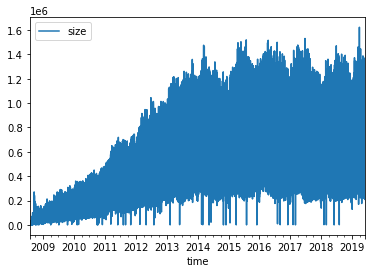

In [8]:
df.plot()

In [9]:
# integrate out oscillations with center moving averages
df = df.join(df.rolling(int(24*365.25), center=True).mean(), rsuffix="_cma")
df

,size,size_cma
time,,
2008-07-31 21:00:00,507.0,NaN
2008-07-31 22:00:00,1096.0,NaN
2008-07-31 23:00:00,1351.0,NaN
2008-08-01 00:00:00,481.0,NaN
2008-08-01 01:00:00,0.0,NaN
...,...,...
2019-06-01 16:00:00,599877.0,NaN
2019-06-01 17:00:00,502281.0,NaN
2019-06-01 18:00:00,620185.0,NaN


<AxesSubplot:xlabel='time'>

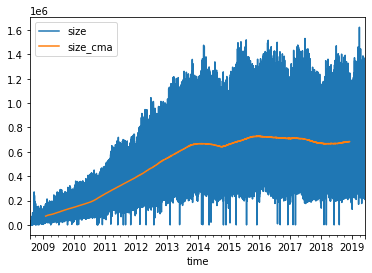

In [10]:
df.plot()

<AxesSubplot:xlabel='time'>

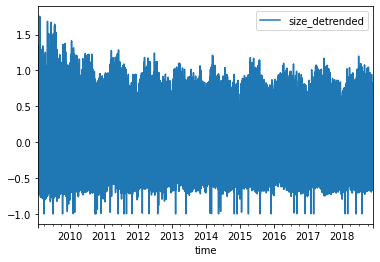

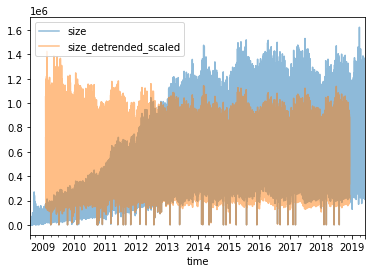

In [11]:
filtered_df = df[df['size_cma'].notnull()].copy()
filtered_df['size_detrended'] = filtered_df['size'].values/filtered_df['size_cma'].values - 1
filtered_df[['size_detrended']].plot()
filtered_df['size_detrended_scaled'] = (filtered_df['size_detrended'] + 1) * filtered_df['size_cma'].mean()
df.join(filtered_df[['size_detrended_scaled']])[['size', 'size_detrended_scaled']].plot(alpha=0.5)

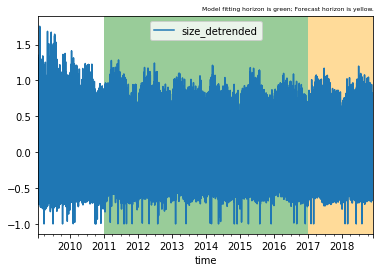

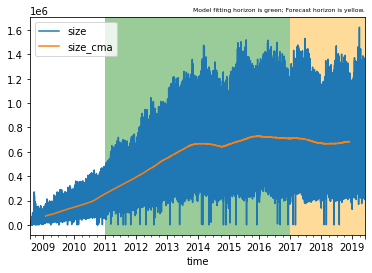

In [12]:
fit_horizon_start = np.datetime64("2011-01-01T00:00:00")
forecast_horizon_start = np.datetime64("2017-01-01T00:00:00")
df['t'] = df.index - fit_horizon_start

def plot_datetime_df_with_highlighted_horizon(dataframe):
    ax = dataframe.plot()
    ax.axvspan(fit_horizon_start, forecast_horizon_start, facecolor='green', edgecolor='none', alpha=.4)
    ax.axvspan(forecast_horizon_start, dataframe.index[-1], facecolor='orange', edgecolor='none', alpha=.4)
    ax.set_title('Model fitting horizon is green; Forecast horizon is yellow.', loc='right', fontdict={'fontsize':6})

plot_datetime_df_with_highlighted_horizon(filtered_df[['size_detrended']])
plot_datetime_df_with_highlighted_horizon(df[['size', 'size_cma']])

In [13]:
fitting_horizon = filtered_df[fit_horizon_start:forecast_horizon_start - np.timedelta64(1,"h")].copy()
signal_fft = np.fft.fft(fitting_horizon['size_detrended'])

In [14]:
sample_rate = 60**-2 # once per hour in Hz
n = len(fitting_horizon)
non_constant_signal_fft = signal_fft[1:] # first term has frequency of zero which is just a constant term
amplitudes = np.absolute(non_constant_signal_fft)/n
frequencies_hz = (np.arange(0, n, 1) * sample_rate / n)[1:]

periods_hours = (1/frequencies_hz)/((60**2))
periods_days = (1/frequencies_hz)/((60**2)*24)

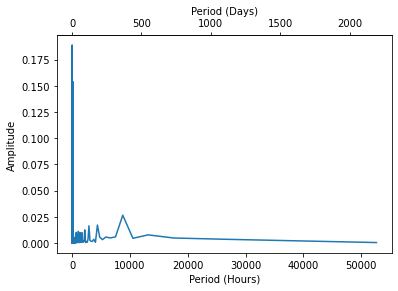

In [15]:
fig, ax = plt.subplots()
ax.set_xlabel("Period (Hours)")
ax.set_ylabel("Amplitude")
secax = ax.secondary_xaxis('top', functions=(lambda x:x/24, lambda x:x*24))
secax.set_xlabel('Period (Days)')
ax.plot(periods_hours, amplitudes)

In [16]:
forecast_indices = df.index >= forecast_horizon_start
cmas = df['size_cma'].values.copy()
cmas[forecast_indices] = fitting_horizon['size_cma'].values[-1]
df['cma_for_extrapolation'] = cmas

# taking an extremely long time because time complexity is O(n*m)
# , where n is the length of DFT series (length of fitting horizon)
# , and m is the length of extrapolation

# also we need to see a plot not just an error number to troubleshoot any issues

# df['forecasts'] = np.nan
# forecasts = df['forecasts'].values.copy()
# num_extrapolations = len(df[fit_horizon_start:])
# extrapolation_indices = df.index >= fit_horizon_start
# forecasts[extrapolation_indices] = cmas[extrapolation_indices] *  (dft_extrapolate(signal_fft, num_extrapolations) + 1)
# df['forecasts'] = forecasts
# df['errors'] = (df['forecasts'] - df['size']).abs()

# forecast_horizon = df[forecast_horizon_start:]
# print(f"Mean Error: {forecast_horizon['errors'].mean()}")
# print(f"Relative Mean Error: {forecast_horizon['errors'].mean()/forecast_horizon['size'].mean()}")

Mean Error: 182641.82213338636
Relative Mean Error: 0.26504276383934694


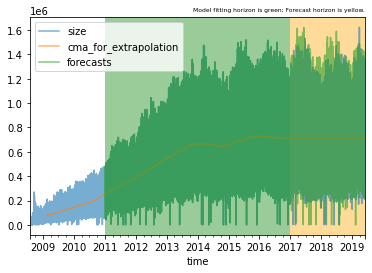

In [17]:
# numpy implementation way too slow
# implement parallel extrapolation with gpu

# appears to always underforecast mondays and overforecast saturdays
import cupy as cp

def dft_extrapolate_cuda(freqdom, num_datapoints):
    num_batches = 20
    n = freqdom.size
    gen_wave = lambda t, A, f, phi: A * cp.cos(2 * cp.pi * f * t + phi)
    freqdom = cp.array(freqdom)
    amplitudes = cp.absolute(freqdom)/n
    phaseshifts = cp.angle(freqdom)
    frequencies = cp.fft.fftfreq(n)
    batch_size = num_datapoints // num_batches
    results = cp.empty(num_datapoints)
    start = 0
    end = 0
    for i in range(num_batches):
        start = batch_size * i
        end = num_datapoints if end > num_datapoints else batch_size * (i + 1)
        t_slice = cp.arange(start, end)
        results[start:end] = cp.sum(gen_wave(cp.expand_dims(t_slice, axis=1), amplitudes, frequencies, phaseshifts), axis=1)
    return cp.asnumpy(results)

def plot_forecasts(dataframe, fit_start=fit_horizon_start, forecast_start=forecast_horizon_start):
    ax = dataframe[['size', 'cma_for_extrapolation', 'forecasts']].plot(alpha=.6)
    ax.axvspan(fit_start, forecast_start, facecolor='green', edgecolor='none', alpha=.4)
    ax.axvspan(forecast_start, dataframe.index[-1], facecolor='orange', edgecolor='none', alpha=.4)
    ax.set_title('Model fitting horizon is green; Forecast horizon is yellow.', loc='right', fontdict={'fontsize':6})

df['forecasts'] = np.nan
forecasts = df['forecasts'].values.copy()
num_extrapolations = len(df[fit_horizon_start:])
extrapolation_indices = df.index >= fit_horizon_start
forecasts[extrapolation_indices] = cmas[extrapolation_indices] *  (dft_extrapolate_cuda(signal_fft, num_extrapolations) + 1)
df['forecasts'] = forecasts
df['errors'] = (df['forecasts'] - df['size']).abs()

forecast_horizon = df[forecast_horizon_start:]
print(f"Mean Error: {forecast_horizon['errors'].mean()}")
print(f"Relative Mean Error: {forecast_horizon['errors'].mean()/forecast_horizon['size'].mean()}")

plot_forecasts(df)

Mean Error: 287686.8361918207
Relative Mean Error: 0.41748003438550607


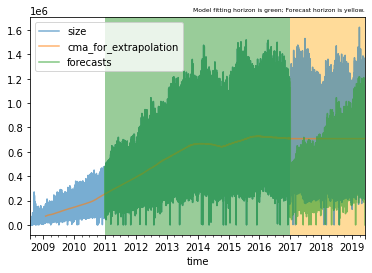

In [18]:
# we verify that our CMA staionarization was not making things worse
# because without it, the error is twice as bad - it's just repeating the original signal
# we dont want to repeat the original signal. we want to find periodical trends with fourier terms
# also the monday underforecasting is still there

# CONCLUSION 1
# staionarity is important for fourier extrapolation of time series
nonstationary_signal_fft = np.fft.fft(fitting_horizon['size'])

df['forecasts'] = np.nan
forecasts = df['forecasts'].values.copy()
num_extrapolations = len(df[fit_horizon_start:])
extrapolation_indices = df.index >= fit_horizon_start
forecasts[extrapolation_indices] = dft_extrapolate_cuda(nonstationary_signal_fft, num_extrapolations)
df['forecasts'] = forecasts
df['errors'] = (df['forecasts'] - df['size']).abs()

forecast_horizon = df[forecast_horizon_start:]
print(f"Mean Error: {forecast_horizon['errors'].mean()}")
print(f"Relative Mean Error: {forecast_horizon['errors'].mean()/forecast_horizon['size'].mean()}")

plot_forecasts(df, fit_horizon_start, forecast_horizon_start)

Mean Error: 102504.52184563583
Relative Mean Error: 0.1487506062886119


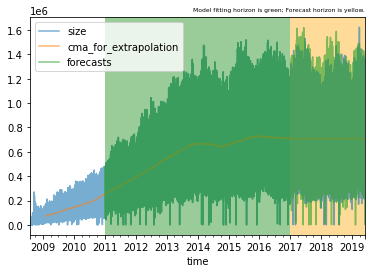

In [19]:
# cheat and shift the forecast left by a day and see if it fixes the errors
# indeed we find that our forecasting series have the weekdays somehow misaligned
# how can we fix this without cheating?
df['forecasts'] = np.nan
forecasts = df['forecasts'].values.copy()
num_extrapolations = len(df[fit_horizon_start:])
num_forecasts = len(df[forecast_horizon_start:])
extrapolation_indices = df.index >= fit_horizon_start
fits = np.append(cmas[extrapolation_indices], [cmas[-1]]*24) *  (dft_extrapolate_cuda(signal_fft, num_extrapolations + 24) + 1)
fits[num_extrapolations - num_forecasts:num_extrapolations] = fits[num_extrapolations - num_forecasts + 24:num_extrapolations + 24]
forecasts[extrapolation_indices] = fits[:num_extrapolations]
df['forecasts'] = forecasts
df['errors'] = (df['forecasts'] - df['size']).abs()

forecast_horizon = df[forecast_horizon_start:]
print(f"Mean Error: {forecast_horizon['errors'].mean()}")
print(f"Relative Mean Error: {forecast_horizon['errors'].mean()/forecast_horizon['size'].mean()}")
plot_forecasts(df)

Mean Error: 190362.46279305738
Relative Mean Error: 0.2762466596127651


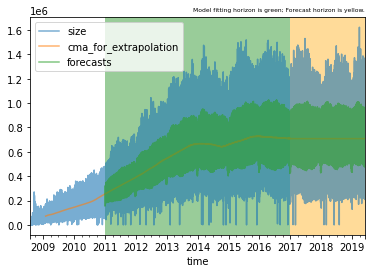

In [20]:
# filter out high frequency terms ("noise"), low frequency terms (trend), and low amplitude terms and see if it fixes the issue without cheating
# actually made predictions slightly worse
def dft_extrapolate_filtered_cpu(freqdom, num_datapoints, index_filter_conditions):
    n = freqdom.size
    amplitudes = np.absolute(freqdom)/n
    phaseshifts = np.angle(freqdom)
    frequencies = np.fft.fftfreq(n)
    ts = np.arange(0, num_datapoints)
    # wave = np.sum(generate_wave(np.expand_dims(ts, axis=1), amplitudes, frequencies, phaseshifts), axis=1)
    indices = np.arange(n)
    unfiltered_indices = indices[~index_filter_conditions]
    return np.sum(generate_wave(np.expand_dims(ts, axis=1), amplitudes[unfiltered_indices], frequencies[unfiltered_indices], phaseshifts[unfiltered_indices]), axis=1)

filtered_indices = np.insert((periods_hours < 5) + (periods_days > 365.25) + (amplitudes < 0.005),0,[True])

df['forecasts'] = np.nan
forecasts = df['forecasts'].values.copy()
num_extrapolations = len(df[fit_horizon_start:])
extrapolation_indices = df.index >= fit_horizon_start
forecasts[extrapolation_indices] = cmas[extrapolation_indices] *  (dft_extrapolate_filtered_cpu(signal_fft, num_extrapolations, filtered_indices) + 1)
df['forecasts'] = forecasts
df['errors'] = (df['forecasts'] - df['size']).abs()

forecast_horizon = df[forecast_horizon_start:]
print(f"Mean Error: {forecast_horizon['errors'].mean()}")
print(f"Relative Mean Error: {forecast_horizon['errors'].mean()/forecast_horizon['size'].mean()}")
plot_forecasts(df)

Mean Error: 171694.21328697065
Relative Mean Error: 0.24915601636719883


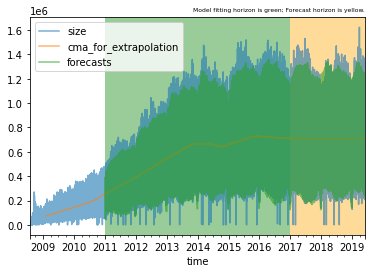

In [21]:
# filter out only low frequency terms (trend) and low amp terms and see if it fixes the issue without cheating
# helps a little, will keep this change for future iterations
filtered_indices = np.insert((periods_days > 365.25) + (amplitudes < 0.005),0,[True])

df['forecasts'] = np.nan
forecasts = df['forecasts'].values.copy()
num_extrapolations = len(df[fit_horizon_start:])
extrapolation_indices = df.index >= fit_horizon_start
forecasts[extrapolation_indices] = cmas[extrapolation_indices] *  (dft_extrapolate_filtered_cpu(signal_fft, num_extrapolations, filtered_indices) + 1)
df['forecasts'] = forecasts
df['errors'] = (df['forecasts'] - df['size']).abs()

forecast_horizon = df[forecast_horizon_start:]
print(f"Mean Error: {forecast_horizon['errors'].mean()}")
print(f"Relative Mean Error: {forecast_horizon['errors'].mean()/forecast_horizon['size'].mean()}")
plot_forecasts(df)

Mean Error: 253875.59491120456
Relative Mean Error: 0.3684144658690639


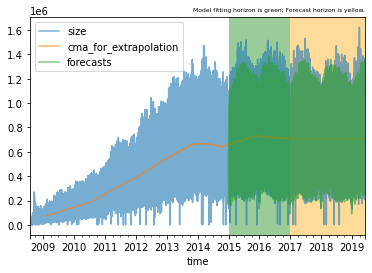

In [22]:
# maybe having a more recent fitting horizon can improve our model rather than one that starts from 2011?
# nope - made things worse
# also the weekdays are still misaligned - now it's overforecasting weekends and underforecasting Tue and Wed
# could it be caused by the starting time of the signal?
# for the 2015 - 2017 fitting horizon, the signal starts on a Thursday - Friday - Saturday - Sunday
# notice 2017 starts on Sunday - Mon - Tue - Wed
# could this misalignment between weekday be causing the systematic over and underforecasting of those weekdays????
shorter_fit_horizon_start = np.datetime64("2015-01-01T00:00:00")
shorter_fitting_horizon = filtered_df[shorter_fit_horizon_start:forecast_horizon_start - np.timedelta64(1,"h")].copy()
shorter_signal_fft = np.fft.fft(shorter_fitting_horizon['size_detrended'])

n = len(shorter_fitting_horizon)
non_constant_signal_fft = shorter_signal_fft[1:] # first term has frequency of zero which is just a constant term
amplitudes = np.absolute(non_constant_signal_fft)/n
frequencies_hz = (np.arange(0, n, 1) * sample_rate / n)[1:]
periods_hours = (1/frequencies_hz)/((60**2))
periods_days = (1/frequencies_hz)/((60**2)*24)
filtered_indices = np.insert((periods_days > 365.25) + (amplitudes < 0.005),0,[True])

df['forecasts'] = np.nan
forecasts = df['forecasts'].values.copy()
num_extrapolations = len(df[shorter_fit_horizon_start:])
num_forecasts = len(df[forecast_horizon_start:])
extrapolation_indices = df.index >= shorter_fit_horizon_start
fits = cmas[extrapolation_indices] *  (dft_extrapolate_filtered_cpu(shorter_signal_fft, num_extrapolations, filtered_indices) + 1)
forecasts[extrapolation_indices] = fits
df['forecasts'] = forecasts
df['errors'] = (df['forecasts'] - df['size']).abs()

forecast_horizon = df[forecast_horizon_start:]
print(f"Mean Error: {forecast_horizon['errors'].mean()}")
print(f"Relative Mean Error: {forecast_horizon['errors'].mean()/forecast_horizon['size'].mean()}")

plot_forecasts(df, shorter_fit_horizon_start, forecast_horizon_start)

Mean Error: 78285.85510525809
Relative Mean Error: 0.11360541175213879


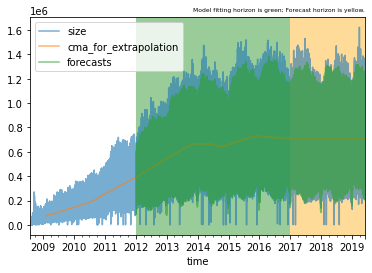

In [23]:
# let's try starting the fitting horizon on 2012 which starts on a sunday, like 2017
# led to much lower error!!!!! 
# only around 10% off relatively, which is really good considering we are predicting 8760 steps ahead
# no more underforecasting on mondays or overfasting on saturdays!!!

# CONCLUSION 2
# sample and forecast need to have the start of their time respective periods aligned for fourer model
# otherwise the waves dont line up as they should for extrapolation
sunday_fit_horizon_start = np.datetime64("2012-01-01T00:00:00")
sunday_fitting_horizon = filtered_df[sunday_fit_horizon_start:forecast_horizon_start - np.timedelta64(1,"h")].copy()
sunday_signal_fft = np.fft.fft(sunday_fitting_horizon['size_detrended'])

n = len(sunday_fitting_horizon)
non_constant_signal_fft = sunday_signal_fft[1:] # first term has frequency of zero which is just a constant term
amplitudes = np.absolute(non_constant_signal_fft)/n
frequencies_hz = (np.arange(0, n, 1) * sample_rate / n)[1:]
periods_hours = (1/frequencies_hz)/((60**2))
periods_days = (1/frequencies_hz)/((60**2)*24)
filtered_indices = np.insert((periods_days > 365.25) + (amplitudes < 0.005),0,[True])

df['forecasts'] = np.nan
forecasts = df['forecasts'].values.copy()
num_extrapolations = len(df[sunday_fit_horizon_start:])
num_forecasts = len(df[forecast_horizon_start:])
extrapolation_indices = df.index >= sunday_fit_horizon_start
fits = cmas[extrapolation_indices] *  (dft_extrapolate_filtered_cpu(sunday_signal_fft, num_extrapolations, filtered_indices) + 1)
forecasts[extrapolation_indices] = fits
df['forecasts'] = forecasts
df['errors'] = (df['forecasts'] - df['size']).abs()

forecast_horizon = df[forecast_horizon_start:]
print(f"Mean Error: {forecast_horizon['errors'].mean()}")
print(f"Relative Mean Error: {forecast_horizon['errors'].mean()/forecast_horizon['size'].mean()}")

plot_forecasts(df, sunday_fit_horizon_start, forecast_horizon_start)

In [24]:
# let's try starting our horizons on fridays
friday_fit_horizon_start = np.datetime64("2010-01-01T00:00:00")
friday_fitting_horizon = filtered_df[friday_fit_horizon_start:forecast_horizon_start - np.timedelta64(1,"h")].copy()
friday_signal_fft = np.fft.fft(friday_fitting_horizon['size_detrended'])

friday_forecast_horizon_start = 

n = len(friday_fitting_horizon)
non_constant_signal_fft = sunday_signal_fft[1:] # first term has frequency of zero which is just a constant term
amplitudes = np.absolute(non_constant_signal_fft)/n
frequencies_hz = (np.arange(0, n, 1) * sample_rate / n)[1:]
periods_hours = (1/frequencies_hz)/((60**2))
periods_days = (1/frequencies_hz)/((60**2)*24)
filtered_indices = np.insert((periods_days > 365.25) + (amplitudes < 0.005),0,[True])

df['forecasts'] = np.nan
forecasts = df['forecasts'].values.copy()
num_extrapolations = len(df[friday_fit_horizon_start:])
num_forecasts = len(df[forecast_horizon_start:])
extrapolation_indices = df.index >= friday_fit_horizon_start
fits = cmas[extrapolation_indices] *  (dft_extrapolate_filtered_cpu(sunday_signal_fft, num_extrapolations, filtered_indices) + 1)
forecasts[extrapolation_indices] = fits
df['forecasts'] = forecasts
df['errors'] = (df['forecasts'] - df['size']).abs()

forecast_horizon = df[forecast_horizon_start:]
print(f"Mean Error: {forecast_horizon['errors'].mean()}")
print(f"Relative Mean Error: {forecast_horizon['errors'].mean()/forecast_horizon['size'].mean()}")

plot_forecasts(df, friday_fit_horizon_start, forecast_horizon_start)

SyntaxError: invalid syntax (<ipython-input-24-97f87941c4a5>, line 6)

In [ ]:
# SUMMMARY of FFT for Time Series
# Pros: 1. widely researched and implemented, with existing libraries 2. Very good at modeling periodic trends in time series
# Cons: 1. Need a way to staitionarize the series to take out non-periodtic trends 2. Very sensitive to alignment of fitting and forecasting periods

In [ ]:
# FUTURE WORK
# 1. compare DFT method to "orthodox" seasonal forecasting models such as SARIMA
# 2. analyze differences in traffic patterns between different stack exchange sites (for example, academia stack exchange and stackoverflow)
# 3. analyze effects of COVID19 on traffic

In [ ]:
# SARIMA

# we will use a grid search procedure to find the empiricially best parameters

# from statsmodels.tsa.statespace.sarimax import SARIMAX
# def sarima_forecast_onestep(history, config, cma_for_forecast):
# 	order, sorder, trend = config
# 	# define model
# 	model = SARIMAX(history, order=order, seasonal_order=sorder, trend=trend, enforce_stationarity=False, enforce_invertibility=False)
# 	# fit model
# 	model_fit = model.fit(disp=False)
# 	# make one step forecast
# 	yhat = (model_fit.forecast() + 1) * cma_for_forecast
# 	return yhat

# def sarima_forecast_multistep(history, config, target_date, cmas_for_forecast):
# 	order, sorder, trend = config
# 	# define model
# 	model = SARIMAX(history, order=order, seasonal_order=sorder, trend=trend, enforce_stationarity=False, enforce_invertibility=False)
# 	# fit model
# 	model_fit = model.fit(disp=False)
# 	# make one step forecast
# 	yhats = (model_fit.forecast(steps=target_date) + 1) * cmas_for_forecast
# 	return yhats

# train_series = sunday_fitting_horizon['size_detrended'].values
# test_series = forecast_horizon['size'].values